In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
import os
import numpy as np
import tifffile as tif

In [3]:
import PIL.Image
from cStringIO import StringIO
import IPython.display
import numpy as np
def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

In [4]:
input_file = 'isbi/train-input.tif'
labels_file = 'isbi/train-labels.tif'
inp = tif.imread(input_file)
out = tif.imread(labels_file)

dset = np.stack((inp, out), axis=3)

In [5]:
dset.shape

(27, 512, 512, 2)

In [54]:
FOV = 256

dataset = tf.constant(dset)
padded_dataset = tf.pad(dataset, [[0,0], [FOV//2, FOV//2], [FOV//2, FOV//2], [0,0]], mode='REFLECT')
sample = tf.random_crop(padded_dataset, size=[1, FOV, FOV, 2])
squeezed_sample = tf.squeeze(sample)

# Perform positional transformations on the image and the label together

# Rotate
distorted_sample = tf.image.random_flip_left_right(squeezed_sample)
distorted_sample = tf.image.random_flip_up_down(distorted_sample)

# Warp

# Separate the labels from the image
distorted_labels = distorted_sample[:,:,1:]
distorted_image = distorted_sample[:,:,0:1]

# Distort the image levels
distorted_image = tf.image.random_brightness(distorted_image, max_delta=0.15)
distorted_image = tf.image.random_contrast(distorted_image, lower=0.5, upper=1.5)

# Whitening
standardized_image = tf.image.per_image_standardization(distorted_image)

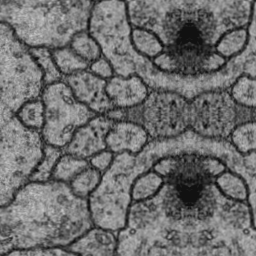

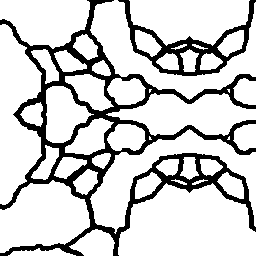

In [55]:
with tf.Session() as sess:
    image, labels = sess.run([distorted_image, distorted_labels])
    showarray(np.squeeze(image))
    showarray(np.squeeze(labels))

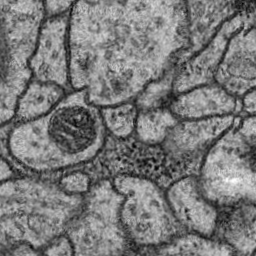